#한국복지패널 데이터를 활용한 한국인의 삶 분석하기

## 1.데이터 준비하기

*  https://www.koweps.re.kr:442/data/data/list.do
*   https://drive.google.com/file/d/1k3kTMPEiWhB7cOD0IXDyyAWvcK05oMaq/view?usp=sharing




### 필요한 패키지 설치

In [1]:
!pip install pyreadstat
!pip install koreanize-matplotlib

### 패키지 임포트

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib

import warnings #주의 코드 가려서 콘솔 창 깨끗하게
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [3]:
# .sav은 통계 분석 소프트웨어 SPSS 전용 파일
# 2020년에 발간된 복지패널 데이터 (2019조사 결과)

raw_welfare = pd.read_spss('/content/drive/MyDrive/ABC/Koweps_hpwc14_2019_beta2.sav')
raw_welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [4]:
# 복사본 만들기
welfare = raw_welfare.copy()
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


###데이터 확인하기

In [5]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [6]:
welfare.shape

(14418, 830)

## 2.데이터 전처리

### 컬럼명 변경하기

In [7]:
#변경할 컬럼의 이름을 dictionary 자료구조로 정의
col_names = {'h14_g3': 'sex',
             'h14_g4': 'birth',
             'h14_g10': 'marriage_type',
             'h14_g11': 'religion',
             'p1402_8aq1': 'income',
             'h14_eco9': 'code_job',
             'h14_reg7': 'region'}
#컬럼명 변경
welfare = welfare.rename(columns=col_names)

### 필요한 컬럼 확인

In [8]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job', 'region']]#NaN-아직 응답X

,sex,birth,marriage_type,religion,income,code_job,region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


## 3.성별에 따른 월급 차이 - 성별에 따라 월급이 달라질까

#### 1) 성별 데이터 확인

In [9]:
print('성별 데이터 타입 확인: ', welfare['sex'].dtypes)
print('성별 데이터 결측치 확인: ', welfare['sex'].isna().sum())
print('성별의 빈도 확인')
welfare['sex'].value_counts()

성별 데이터 타입 확인:  float64
성별 데이터 결측치 확인:  0
성별의 빈도 확인


sex
2.0    7913
1.0    6505
Name: count, dtype: int64

#### 2) 성별 데이터 전처리

In [10]:
# 코드로 되어 있는 성별(1.0, 2.0) -> 문자열 (male, female)변환
# 1.0 -> male, 2.0 -> female

welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')#반복하면 모두 female로 바뀜
print('성별의 빈도 확인')
welfare['sex'].value_counts()

성별의 빈도 확인


sex
female    7913
male      6505
Name: count, dtype: int64

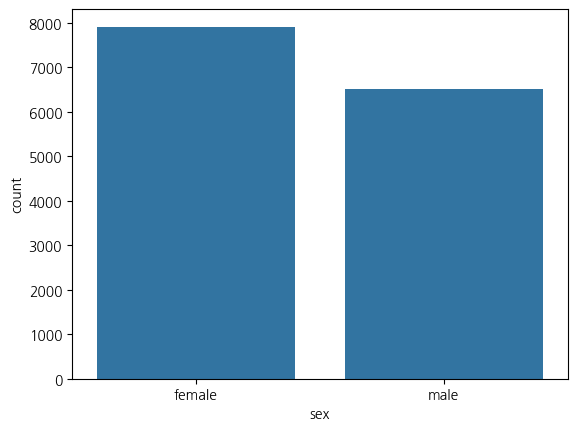

In [11]:
# 그래프로 확인
sns.countplot(welfare, x = 'sex')
plt.show()

#### 3) 월급 데이터 확인

In [12]:
print('월급 데이터 타입 확인: ', welfare['income'].dtypes)
print('월급 데이터 결측치 확인: ', welfare['income'].isna().sum())
print('월급 요약 통계량 확인')
welfare['income'].describe()

월급 데이터 타입 확인:  float64
월급 데이터 결측치 확인:  9884
월급 요약 통계량 확인


count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

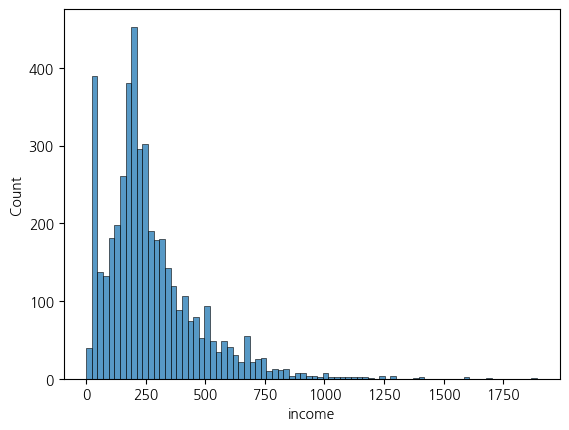

In [13]:
# 그래프로 확인 -> 월급 분포도 -> 200~250만원 사이의 월급이 많이 분포하고, 뒤로 갈수록 감소
sns.histplot(data=welfare, x='income')
plt.show()

#### 4) 월급 데이터 전처리 -> 결측치 제거

In [14]:
welfare.dropna(subset=['income'], inplace=True)
print('월급 데이터 결측치 확인: ', welfare['income'].isna().sum())

월급 데이터 결측치 확인:  0


In [15]:
welfare.shape

(4534, 830)

#### 5) 성별-월급 평균표

In [16]:
# 성별에 따른 월급 평균표 만들기
sex_income = welfare.groupby('sex', as_index=False).agg(mean_income=('income', 'mean')) #index 깨기 -> 컬럼으로 쓰기, agg 통계
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


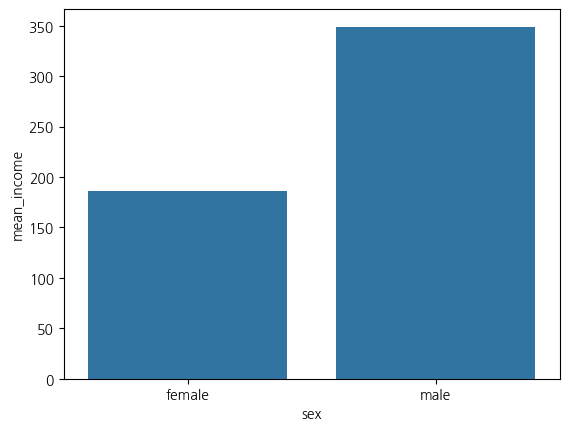

In [17]:
# 성별에 따른 월급 차이 분석 -> 349.037571 - 186.293096 = 162만원 차이
# 남성의 평균 월급이 여성의 두배에 가까움
sns.barplot(data=sex_income, x='sex', y='mean_income')
plt.show()

In [18]:
px.pie(sex_income, names='sex', values='mean_income')

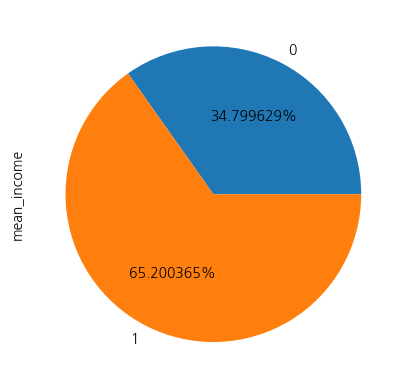

In [19]:
sex_income['mean_income'].plot.pie(autopct='%2f%%');

## 4.나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?

### 1) 나이 데이터 확인

In [20]:
print('나이 데이터 타입 확인: ', welfare['birth'].dtypes)
print('나이 데이터 결측치 확인: ', welfare['birth'].isna().sum())
print('나이 요약 통계량 확인')
welfare['birth'].describe

나이 데이터 타입 확인:  float64
나이 데이터 결측치 확인:  0
나이 요약 통계량 확인


<bound method NDFrame.describe of 2        1942.0
3        1962.0
7        1934.0
8        1940.0
14       1978.0
          ...  
14401    1966.0
14402    1962.0
14405    1947.0
14410    1956.0
14416    1998.0
Name: birth, Length: 4534, dtype: float64>

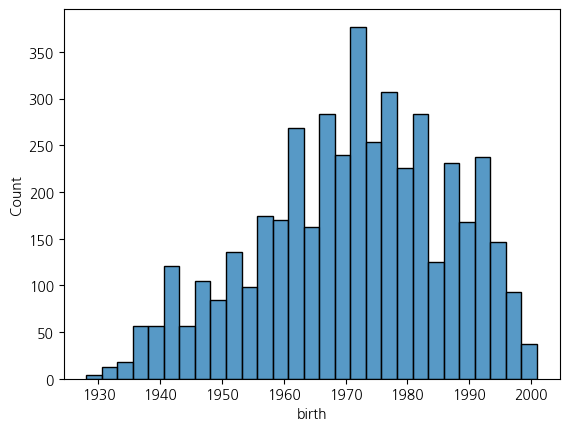

In [21]:
#그래프로 확인 -> 출생년도 분포도
sns.histplot(data=welfare, x='birth')
plt.show()

### 2) 출생년도 전처리 -> 파생 데이터 -> 나이 데이터 만들기

In [23]:
# (2019-출생년도) + 1
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare[['birth', 'age']]

,birth,age
2,1942.0,78.0
3,1962.0,58.0
7,1934.0,86.0
8,1940.0,80.0
14,1978.0,42.0
...,...,...
14401,1966.0,54.0
14402,1962.0,58.0
14405,1947.0,73.0
14410,1956.0,64.0


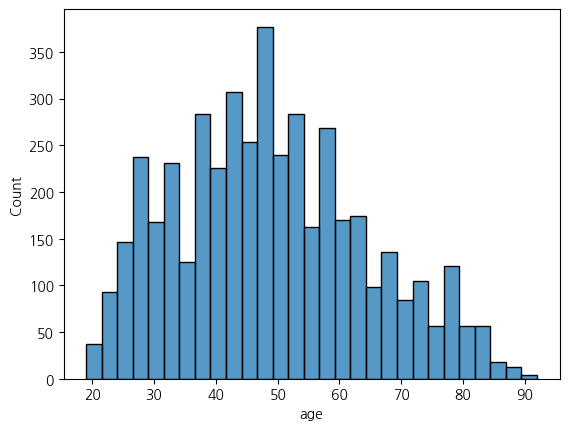

In [24]:
#그래프로 확인 -> 나이 분포도
sns.histplot(data=welfare, x='age')
plt.show()

In [25]:
welfare['age'].describe()

count    4534.000000
mean       48.855315
std        15.290056
min        19.000000
25%        38.000000
50%        48.000000
75%        59.000000
max        92.000000
Name: age, dtype: float64

### 3) 나이에 따른 월급 평균표 만들기

In [26]:
age_income = welfare.groupby('age').agg(mean_income=('income', 'mean'))
age_income

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


### 4) 나이와 월급의 관계 분석

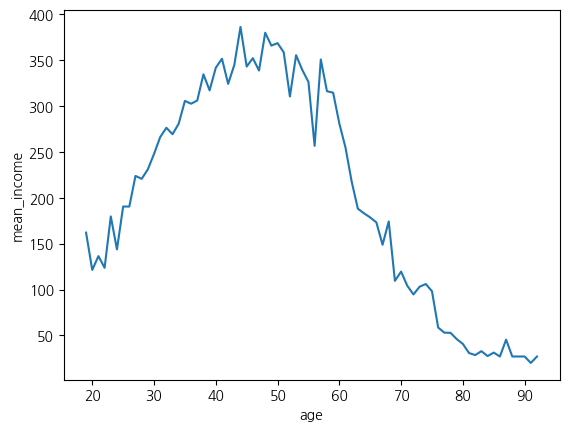

In [27]:
# 나이와 월급의 관계 분석 -> 몇살 때 가장 많은 월급을 받는지 확인 -> ?
sns.lineplot(data=age_income, x='age', y='mean_income')
plt.show()

In [28]:
# 가장 월급을 많이 받는 나이와 금액 -> 44세
age_income.idxmax()

mean_income    44.0
dtype: float64

In [29]:
age_income.loc[age_income.idxmax(), ['mean_income']]

,mean_income
age,
44.0,386.195876


## 5.연령대에 따른 월급차이 - 어떤 연령대가 월급을 가장 많이 받을까

### 1) 나이 데이터 확인

In [ ]:
# 연령대 구간 초년층: 30세 미만, 중년층: 30~59세, 노년층: 60세 이상
welfare['age'].describe()

### 2) 연령대 파생데이터 만들기

In [30]:
#나이에서 초년(young), 중년(middle), 장년(old) 범주형의 파생데이터 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                         np.where(welfare['age'] <= 59, 'middle', 'old')))
welfare[['age', 'ageg']]

,age,ageg
2,78.0,old
3,58.0,middle
7,86.0,old
8,80.0,old
14,42.0,middle
...,...,...
14401,54.0,middle
14402,58.0,middle
14405,73.0,old
14410,64.0,old


In [31]:
welfare['ageg'].value_counts()

ageg
middle    2927
old       1093
young      514
Name: count, dtype: int64

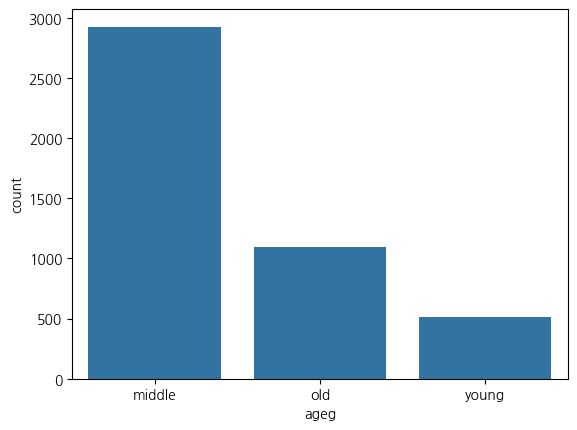

In [33]:
# 그래프로 확인하기 -> 데이터 큰 순으로 정렬해서 그래프 그리기
sns.countplot(data=welfare, x='ageg', order=welfare['ageg'].value_counts().index)
plt.show()

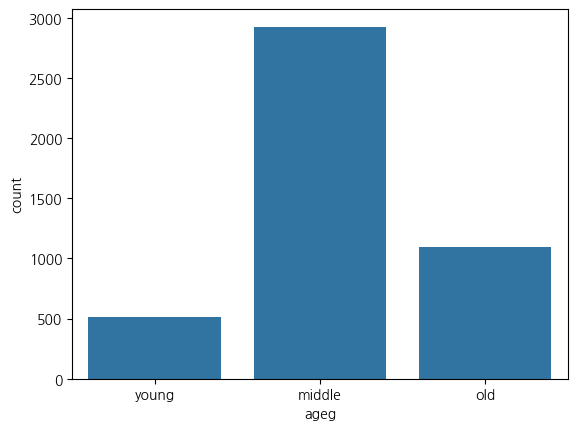

In [34]:
# 그래프로 확인하기 -> 연령대의 순서대로 그래프 그리기
sns.countplot(data=welfare, x='ageg', order=['young', 'middle', 'old'])
plt.show()

### 3) 연령대별 월급 평균표 만들기

In [35]:
ageg_income = welfare.groupby('ageg', as_index=False).agg(mean_income=('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


### 4) 연령대에 따른 월급 차이 분석

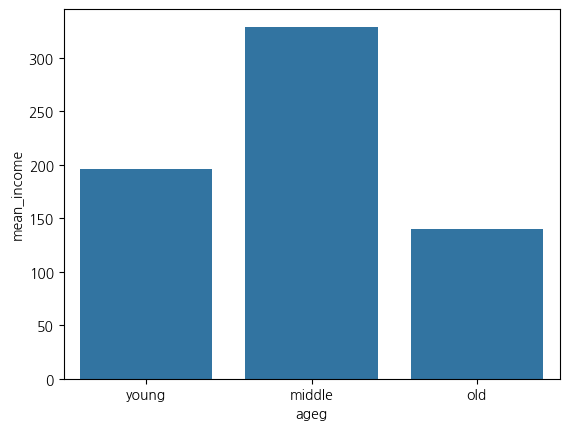

In [36]:
# 연령대에 따른 월급 차이 분석 -> 가장 월급을 많이 받는 연령대는 중년층
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])
plt.show()

In [38]:
# 가장 높은 평균월급과 차이 확인 -> 칼럼 하나 만들어서 확인 ->
ageg_income['diff'] = ageg_income['mean_income'].sub(ageg_income['mean_income'].max())
ageg_income

,ageg,mean_income,diff
0,middle,329.157157,0.000000
1,old,140.129003,-189.028155
2,young,195.663424,-133.493733


## 6.연령대 및 성별 월급 차이 - 성별, 월급의 차이는 연령대별로 다를까?

### 1) 연령대 및 성별 월급 평균표

In [40]:
sex_income = welfare.groupby(['ageg', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


### 2) 연령대 및 월급차이 분석

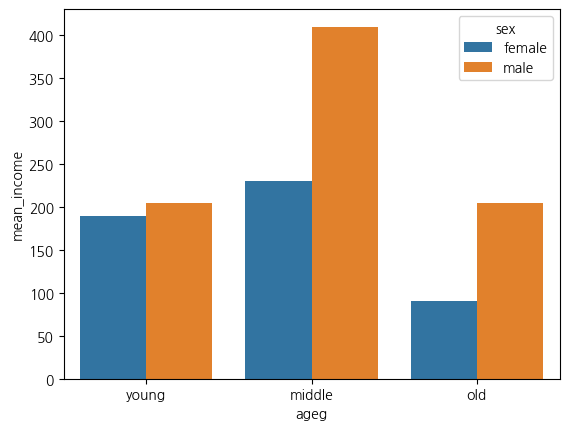

In [41]:
# 연령대 및 성별 월급 차이 분석 -> 모든 연령대에 남성 평균 급여가 높고, 중년층부터 확연하게 차이 발생
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex',
            order=['young', 'middle', 'old'])
plt.show()

### 3) 나이 및 성별 월급 평균표 만들기

In [43]:
sex_age_income = welfare.groupby(['age', 'sex'], as_index=False).agg(mean_income=('income', 'mean'))
sex_age_income

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


### 4) 나이 및 성별 월급 차이 분석

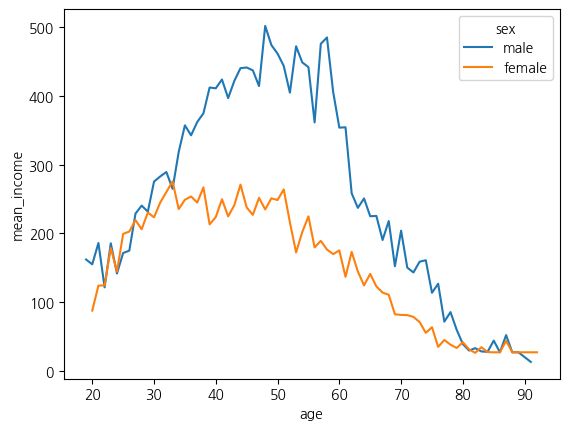

In [44]:
sns.lineplot(data=sex_age_income, x='age', y='mean_income', hue='sex')
plt.show()

## 7.직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 1) 직업 데이터 확인하기

In [45]:
print('직업 데이터 타입 확인: ', welfare['code_job'].dtypes)
print('직업 데이터 결측치 확인: ', welfare['code_job'].isna().sum())
print('직업의 빈도 확인')
welfare['code_job'].value_counts()

직업 데이터 타입 확인:  float64
직업 데이터 결측치 확인:  0
직업의 빈도 확인


code_job
941.0    353
312.0    267
313.0    201
930.0    197
521.0    166
        ... 
819.0      1
861.0      1
882.0      1
630.0      1
872.0      1
Name: count, Length: 147, dtype: int64

### 2) 직업 데이터 전처리

In [47]:
# 코드로 되어 있는 부분을 연결해서 직업명을 추가
list_job = pd.read_excel('/content/drive/MyDrive/ABC/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [48]:
# welfare 데이터 프레임에 code_job(칼럼) 기준으로 매칭되는 job 컬림 합치기
welfare = welfare.merge(list_job, how='left', on='code_job')
welfare[['code_job', 'job']]

,code_job,job
0,762.0,전기공
1,855.0,금속기계 부품 조립원
2,941.0,청소원 및 환경미화원
3,999.0,기타 서비스 관련 단순 종사자
4,312.0,경영 관련 사무원
...,...,...
4529,874.0,물품 이동 장비 조작원
4530,930.0,제조 관련 단순 종사자
4531,941.0,청소원 및 환경미화원
4532,854.0,운송차량 및 기계 관련 조립원


In [49]:
welfare[['code_job', 'job']].isna().sum()#결측치 확인

code_job    0
job         0
dtype: int64

### 3) 직업별 월급 평균표 만들기

In [50]:
job_income = welfare.groupby('job', as_index=False).agg(mean_income=('income', 'mean'))
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [51]:
# 월급 가장 많이 받는 직업
job_income.sort_values('mean_income', ascending=False)

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
...,...,...
43,돌봄 및 보건 서비스 종사자,117.162338
0,가사 및 육아 도우미,92.455882
128,청소원 및 환경미화원,88.461756
34,기타 서비스 관련 단순 종사자,77.789474


### 4) 월급 가장 많이 받는 직업 TOP10

In [56]:
job_top10 = job_income.sort_values('mean_income', ascending=False).head(10)
job_top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


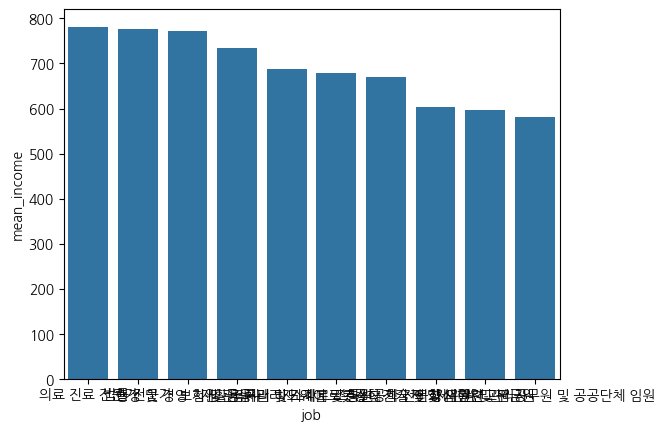

In [57]:
# 그래프로 확인하기
sns.barplot(data=job_top10, x='job', y='mean_income')
plt.show()

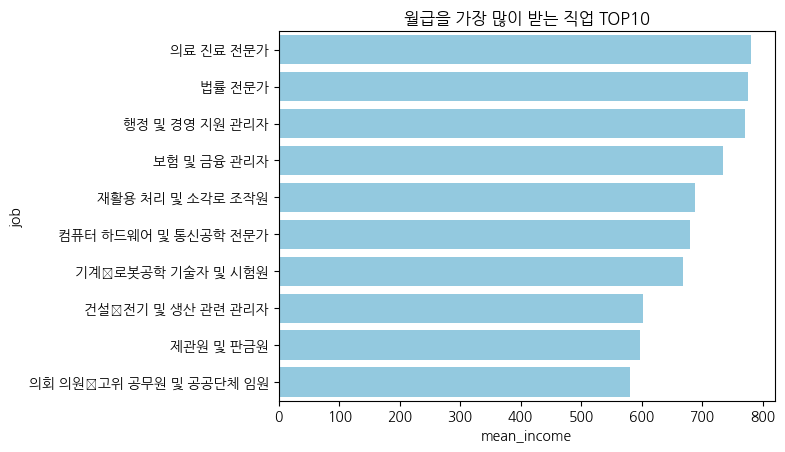

In [73]:
# 그래프로 확인하기
sns.barplot(data=job_top10, x='mean_income', y='job', color='skyblue')
plt.title('월급을 가장 많이 받는 직업 TOP10')
plt.show()

### 5) 월급을 가장 적게 받는 직업 TOP10

In [69]:
job_smallest_top10 = job_income.sort_values('mean_income', ascending=True).head(10)#ascending False -> True(내림차순 -> 오름차순) or tail(10)*순서 거꾸로
job_smallest_top10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


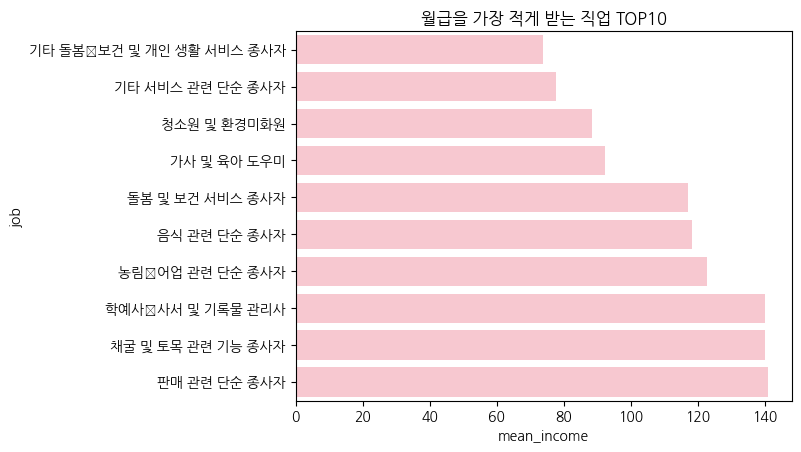

In [74]:
# 그래프로 확인하기
sns.barplot(data=job_smallest_top10, x='mean_income', y='job', color='pink')
plt.title('월급을 가장 적게 받는 직업 TOP10')
plt.show()

## 8.성별 직업 빈도 - 성별로 어떤 직업이 가장 많은가

### 1) 성별 직업 빈도표

In [77]:
# 남성 데이터 중에서 직업의 빈도수를 계산하고 상위 10개를 추출

# 1) 남성 데이터 추출 2) 직업으로 그룹핑 3) 직업으로 빈도수 4) 가장 많은 빈도 기준으로 정렬 5) 10만 추출
job_male = welfare.query("sex == 'male'").groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)
job_male

,job,n
11,경영 관련 사무원,212
102,자동차 운전원,114
125,청소원 및 환경미화원,92
88,영업 종사자,91
3,건물 관리원 및 검표원,78
137,행정 사무원,74
118,제조 관련 단순 종사자,69
46,매장 판매 종사자,60
112,전기∙전자기기 설치 및 수리원,52
58,배달원,52


In [78]:
# 여성 데이터 중에서 직업의 빈도수를 계산하고 상위 10개를 추출

# 1) 여성 데이터 추출 2) 직업으로 그룹핑 3) 직업으로 빈도수 4) 가장 많은 빈도 기준으로 정렬 5) 10만 추출
job_female = welfare.query("sex == 'female'").groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)
job_female

,job,n
78,청소원 및 환경미화원,261
92,회계 및 경리 사무원,151
26,돌봄 및 보건 서비스 종사자,151
75,제조 관련 단순 종사자,128
28,매장 판매 종사자,106
64,음식 관련 단순 종사자,101
21,기타 서비스 관련 단순 종사자,83
10,고객 상담 및 기타 사무원,74
76,조리사,72
1,간호사,70


In [79]:
# 40세 미만 데이터 중에서 직업의 빈도수를 계산하고 상위 10개를 추출

# 1) 40세 미만 데이터 추출 2) 직업으로 그룹핑 3) 직업으로 빈도수 4) 가장 많은 빈도 기준으로 정렬 5) 10만 추출
job_young = welfare.query("age < 40").groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)
job_young

,job,n
8,경영 관련 사무원,98
123,회계 및 경리 사무원,86
38,매장 판매 종사자,67
102,제조 관련 단순 종사자,53
55,비서 및 사무 보조원,50
12,고객 상담 및 기타 사무원,49
0,간호사,45
66,식음료 서비스 종사자,40
118,행정 사무원,40
116,학교 교사,39


In [80]:
# 40세 이상 데이터 중에서 직업의 빈도수를 계산하고 상위 10개를 추출

# 1) 40세 이상 데이터 추출 2) 직업으로 그룹핑 3) 직업으로 빈도수 4) 가장 많은 빈도 기준으로 정렬 5) 10만 추출
job_middle = welfare.query("age >= 40").groupby('job', as_index=False).agg(n=('job', 'count')).sort_values('n', ascending=False).head(10)#job을 집계->count로, 데이터 타입 파악해서, 수치형일 경우 다양해짐
job_middle

,job,n
126,청소원 및 환경미화원,350
11,경영 관련 사무원,169
43,돌봄 및 보건 서비스 종사자,149
119,제조 관련 단순 종사자,144
144,회계 및 경리 사무원,115
34,기타 서비스 관련 단순 종사자,115
103,자동차 운전원,110
46,매장 판매 종사자,99
87,영업 종사자,96
139,행정 사무원,88


### 2) 나이별 직업 빈도 분석하기

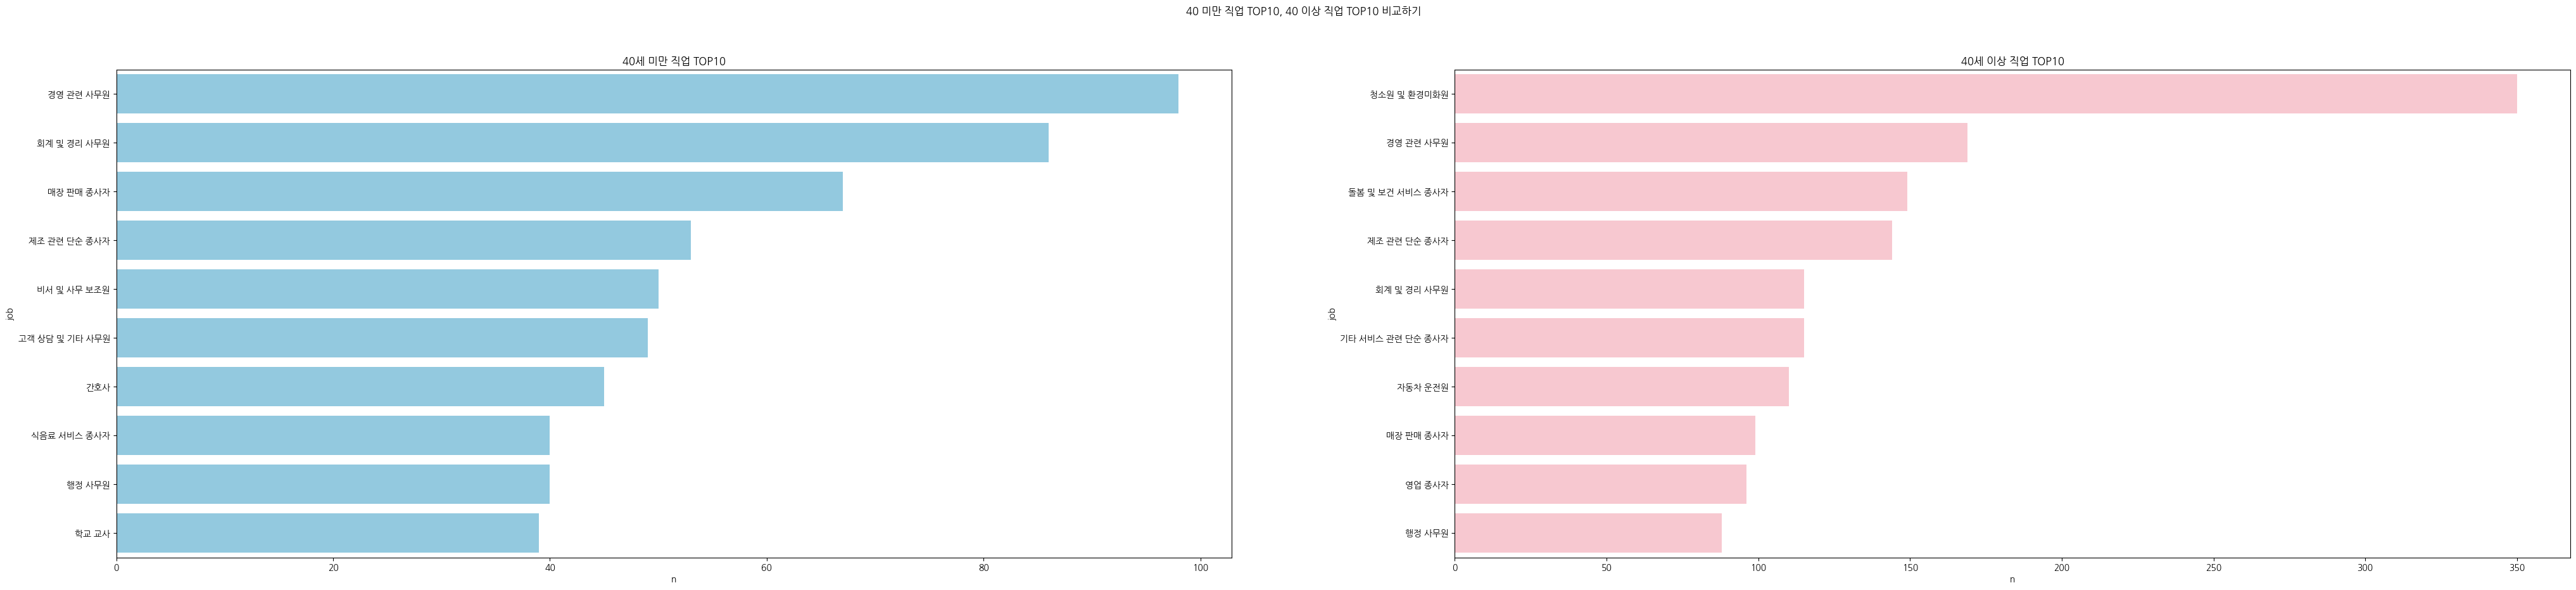

In [84]:
# 40 미만 직업 TOP10, 40 이상 직업 TOP10 비교하기

fig, axes = plt.subplots(1,2, figsize=(50, 10))
fig.suptitle('40 미만 직업 TOP10, 40 이상 직업 TOP10 비교하기')

sns.barplot(data=job_young, x='n', y='job', ax=axes[0], color='skyblue')
axes[0].set_title('40세 미만 직업 TOP10')

sns.barplot(data=job_middle, x='n', y='job', ax=axes[1], color='pink')
axes[1].set_title('40세 이상 직업 TOP10')

plt.show()